In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
# get the data logs as DFs

df_gp_1 = pd.read_csv("run-data/gp/1/log.csv")
df_gp_2 = pd.read_csv("run-data/gp/2/log.csv")
df_gp_3 = pd.read_csv("run-data/gp/3/log.csv")

df_tpgsbb_1 = pd.read_csv("run-data/tpgsbb/1/log.csv")
df_tpgsbb_2 = pd.read_csv("run-data/tpgsbb/2/log.csv")
df_tpgsbb_3 = pd.read_csv("run-data/tpgsbb/3/log.csv")

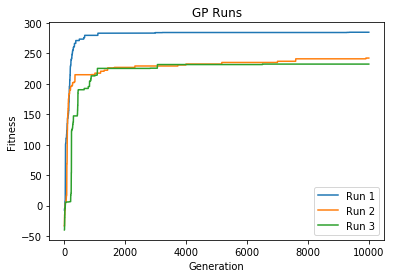

In [46]:
# GP runs
plt.plot(df_gp_1["fitness_max"].tolist()[:10000], label="Run 1")
plt.plot(df_gp_2["fitness_max"].tolist()[:10000], label="Run 2")
plt.plot(df_gp_3["fitness_max"].tolist()[:10000], label="Run 3")

plt.title("GP Runs")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.show()

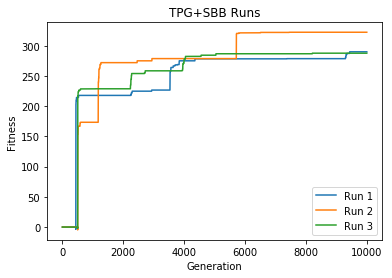

In [57]:
# TPGSBB runs
plt.plot(df_tpgsbb_1["fitness_max"].tolist()[:10000], label="Run 1")
plt.plot(df_tpgsbb_2["fitness_max"].tolist()[:10000], label="Run 2")
plt.plot(df_tpgsbb_3["fitness_max"].tolist()[:10000], label="Run 3")

plt.title("TPG+SBB Runs")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.show()

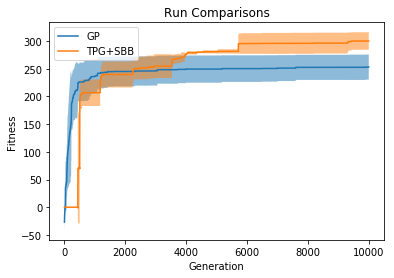

In [58]:
# comparison over average of runs with standard deviations

gp_arr = np.array(((df_gp_1["fitness_max"][:10000]), 
          np.array(df_gp_2["fitness_max"][:10000]), 
          np.array(df_gp_3["fitness_max"][:10000])))
gp_means = np.mean(gp_arr, axis=0)
gp_stds = np.std(gp_arr, axis=0)

tpgsbb_arr = np.array(((df_tpgsbb_1["fitness_max"][:10000]), 
          np.array(df_tpgsbb_2["fitness_max"][:10000]), 
          np.array(df_tpgsbb_3["fitness_max"][:10000])))
tpgsbb_means = np.mean(tpgsbb_arr, axis=0)
tpgsbb_stds = np.std(tpgsbb_arr, axis=0)


plt.plot(gp_means, label="GP")
plt.fill_between(range(10000), 
                 gp_means-gp_stds, gp_means+gp_stds,
                alpha=0.5)

plt.plot(tpgsbb_means, label="TPG+SBB")
plt.fill_between(range(10000), 
                 tpgsbb_means-tpgsbb_stds, tpgsbb_means+tpgsbb_stds,
                alpha=0.5)

plt.title("Run Comparisons")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.show()

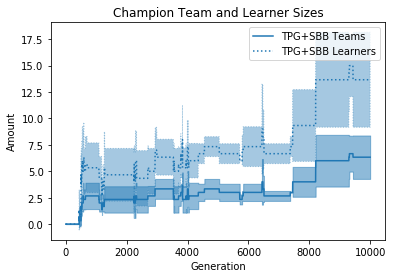

In [62]:
# comparison of champion team and learner sizes

tpgsbb_teams_arr = np.array(((df_tpgsbb_1["champ_teams"][:10000]), 
          np.array(df_tpgsbb_2["champ_teams"][:10000]), 
          np.array(df_tpgsbb_3["champ_teams"][:10000])))
tpgsbb_teams_means = np.mean(tpgsbb_teams_arr, axis=0)
tpgsbb_teams_stds = np.std(tpgsbb_teams_arr, axis=0)

tpgsbb_learners_arr = np.array(((df_tpgsbb_1["champ_learners"][:10000]), 
          np.array(df_tpgsbb_2["champ_learners"][:10000]), 
          np.array(df_tpgsbb_3["champ_learners"][:10000])))
tpgsbb_learners_means = np.mean(tpgsbb_learners_arr, axis=0)
tpgsbb_learners_stds = np.std(tpgsbb_learners_arr, axis=0)


plt.plot(tpgsbb_teams_means, color=colors[0], label="TPG+SBB Teams")
plt.fill_between(range(10000), 
                 tpgsbb_teams_means-tpgsbb_teams_stds, tpgsbb_teams_means+tpgsbb_teams_stds,
                alpha=0.5, color=colors[0])

plt.plot(tpgsbb_learners_means, color=colors[0], linestyle="dotted", label="TPG+SBB Learners")
plt.fill_between(range(10000), 
                 tpgsbb_learners_means-tpgsbb_learners_stds, tpgsbb_learners_means+tpgsbb_learners_stds,
                alpha=0.4, color=colors[0], linestyle="dotted")

plt.title("Champion Team and Learner Sizes")
plt.xlabel("Generation")
plt.ylabel("Amount")
plt.legend()

plt.show()

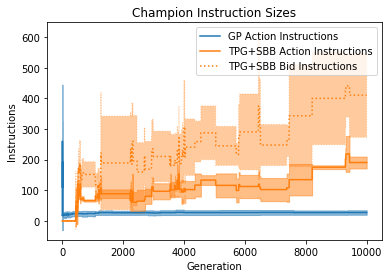

In [61]:
# comparison of champion instruction sizes

gp_act_arr = np.array(((df_gp_1["champ_act_instructions"][:10000]), 
          np.array(df_gp_2["champ_act_instructions"][:10000]), 
          np.array(df_gp_3["champ_act_instructions"][:10000])))
gp_act_means = np.mean(gp_act_arr, axis=0)
gp_act_stds = np.std(gp_act_arr, axis=0)


tpgsbb_act_arr = np.array(((df_tpgsbb_1["champ_act_instructions"][:10000]), 
          np.array(df_tpgsbb_2["champ_act_instructions"][:10000]), 
          np.array(df_tpgsbb_3["champ_act_instructions"][:10000])))
tpgsbb_act_means = np.mean(tpgsbb_act_arr, axis=0)
tpgsbb_act_stds = np.std(tpgsbb_act_arr, axis=0)

tpgsbb_bid_arr = np.array(((df_tpgsbb_1["champ_instructions"][:10000]), 
          np.array(df_tpgsbb_2["champ_instructions"][:10000]), 
          np.array(df_tpgsbb_3["champ_instructions"][:10000])))
tpgsbb_bid_means = np.mean(tpgsbb_bid_arr, axis=0)
tpgsbb_bid_stds = np.std(tpgsbb_bid_arr, axis=0)


plt.plot(gp_act_means, color=colors[0], label="GP Action Instructions")
plt.fill_between(range(10000), 
                 gp_act_means-gp_act_stds, gp_act_means+gp_act_stds,
                alpha=0.5, color=colors[0])

plt.plot(tpgsbb_act_means, color=colors[1], label="TPG+SBB Action Instructions")
plt.fill_between(range(10000), 
                 tpgsbb_act_means-tpgsbb_act_stds, tpgsbb_act_means+tpgsbb_act_stds,
                alpha=0.5, color=colors[1])

plt.plot(tpgsbb_bid_means, color=colors[1], linestyle="dotted", label="TPG+SBB Bid Instructions")
plt.fill_between(range(10000), 
                 tpgsbb_bid_means-tpgsbb_bid_stds, tpgsbb_bid_means+tpgsbb_bid_stds,
                alpha=0.4, color=colors[1], linestyle="dotted")

plt.title("Champion Instruction Sizes")
plt.xlabel("Generation")
plt.ylabel("Instructions")
plt.legend()

plt.show()

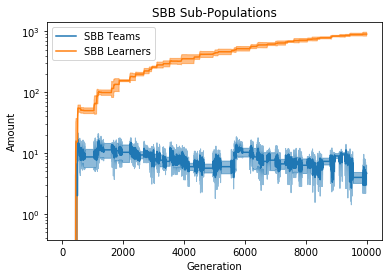

Final SBB Team Portion:  0.012939001848428836
Final SBB Learner Portion:  0.6239907727797


In [68]:
# visualize sbb pop size over time in tpgsbb
sbb_teams_all = np.array(((df_tpgsbb_1["b_teams"][:10000]), 
          np.array(df_tpgsbb_2["b_teams"][:10000]), 
          np.array(df_tpgsbb_3["b_teams"][:10000])))
sbb_teams_all_means = np.mean(sbb_teams_all, axis=0)
sbb_teams_all_stds = np.std(sbb_teams_all, axis=0)

sbb_learners_all = np.array(((df_tpgsbb_1["b_learners"][:10000]), 
          np.array(df_tpgsbb_2["b_learners"][:10000]), 
          np.array(df_tpgsbb_3["b_learners"][:10000])))
sbb_learners_all_means = np.mean(sbb_learners_all, axis=0)
sbb_learners_all_stds = np.std(sbb_learners_all, axis=0)

plt.plot(sbb_teams_all_means, color=colors[0], label="SBB Teams")
plt.fill_between(range(10000), 
                 sbb_teams_all_means-sbb_teams_all_stds, sbb_teams_all_means+sbb_teams_all_stds,
                alpha=0.5, color=colors[0])

plt.plot(sbb_learners_all_means, color=colors[1], label="SBB Learners")
plt.fill_between(range(10000), 
                 sbb_learners_all_means-sbb_learners_all_stds, sbb_learners_all_means+sbb_learners_all_stds,
                alpha=0.5, color=colors[1])

plt.title("SBB Sub-Populations")
plt.xlabel("Generation")
plt.ylabel("Amount")
plt.legend()

plt.yscale("log")
plt.show()



teams_all = np.mean(np.array((df_tpgsbb_1["pop_teams"][9999], 
                      df_tpgsbb_2["pop_teams"][9999], 
                      df_tpgsbb_3["pop_teams"][9999])))

learners_all = np.mean(np.array((df_tpgsbb_1["pop_learners"][9999], 
                      df_tpgsbb_2["pop_learners"][9999], 
                      df_tpgsbb_3["pop_learners"][9999])))

print("Final SBB Team Portion: ", sbb_teams_all_means[9999] / teams_all)
print("Final SBB Learner Portion: ", sbb_learners_all_means[9999] / learners_all)